In [186]:
import pandas as pd
import numpy as np

In [187]:
df=pd.read_csv("D:\Rushikesh Landge\datasets\diamonds.csv")


<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\saai\AppData\Local\Temp\ipykernel_19484\3007689431.py:1: SyntaxWarning: invalid escape sequence '\R'
  df=pd.read_csv("D:\Rushikesh Landge\datasets\diamonds.csv")


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Problem Statement: Diamond Price Prediction

The price of a diamond is influenced by several measurable attributes related to its quality, size, and physical dimensions. This dataset contains the following features:
id – Unique identifier for each diamond

carat – Weight of the diamond

cut – Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

colour – Color grade of the diamond

clarity – Measure of diamond clarity

depth – Total depth percentage

table – Width of the top of the diamond relative to its widest point

x, y, z – Physical dimensions of the diamond (length, width, depth in mm)

price – Price of the diamond (target variable)


In [189]:
df.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [190]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [191]:
df=df.drop(labels=['id'],axis=1)

In [192]:
df.duplicated().sum


<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool>

In [193]:
df.dtypes!='object'

carat       True
cut        False
color      False
clarity    False
depth       True
table       True
price       True
x           True
y           True
z           True
dtype: bool

In [194]:
num_col=df.columns[df.dtypes!='object']
obj_col=df.columns[df.dtypes=='object']
print(f"Here is the numerical col :- {num_col}")
print(f"Here is the objective col :- {obj_col} ")

Here is the numerical col :- Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Here is the objective col :- Index(['cut', 'color', 'clarity'], dtype='object') 


In [195]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [196]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [197]:
df.shape

(53940, 10)

In [198]:
import seaborn as sns
import matplotlib.pyplot  as plt

In [199]:
for i in num_col:
    print(i)

carat
depth
table
price
x
y
z


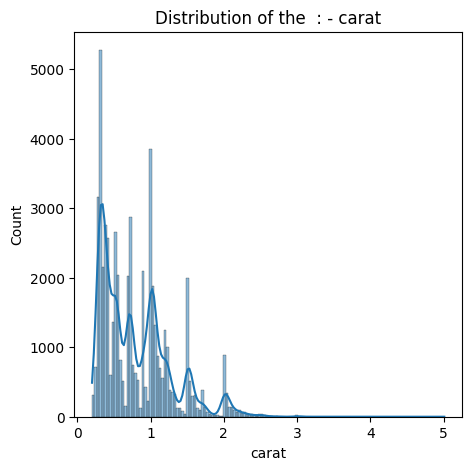

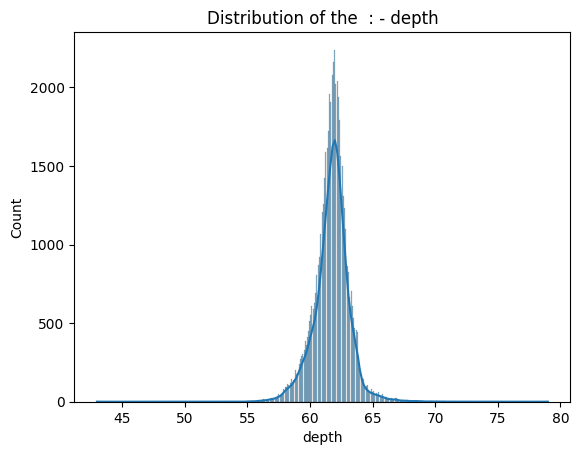

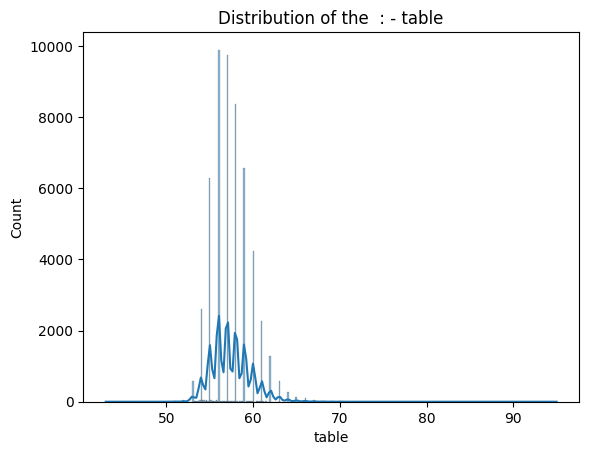

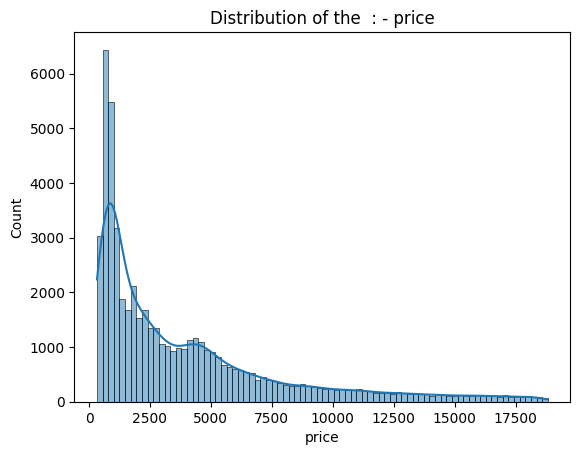

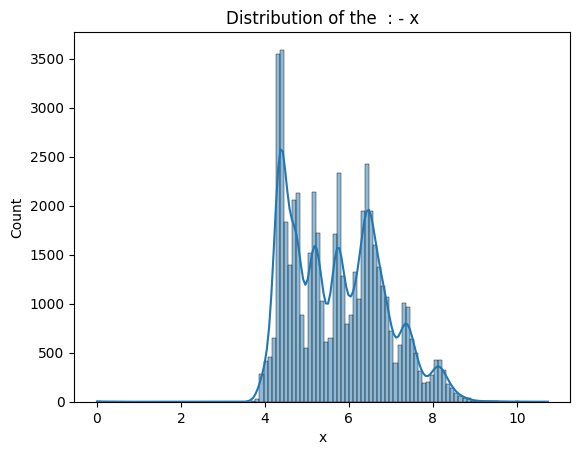

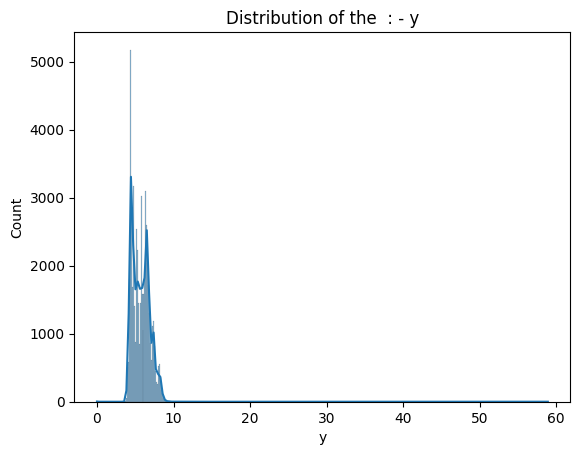

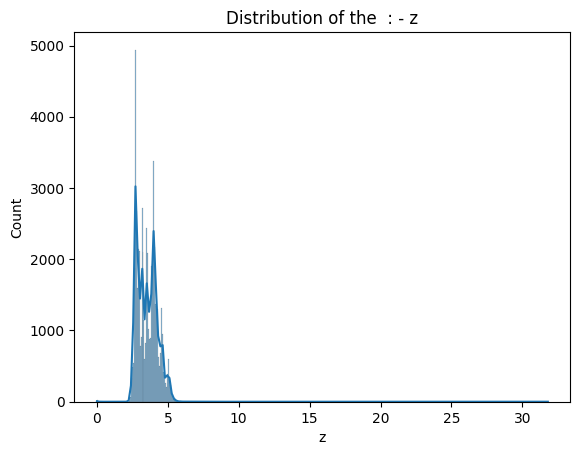

In [200]:
plt.figure(figsize=(5,5))
x=0
for i in num_col:
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f"Distribution of the  : - {i}")
    plt.show()

In [201]:
data_num=df[num_col]


<Axes: >

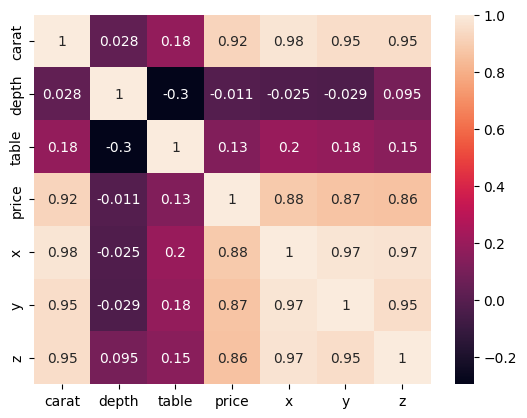

In [202]:
sns.heatmap(data_num.corr(),annot=True)

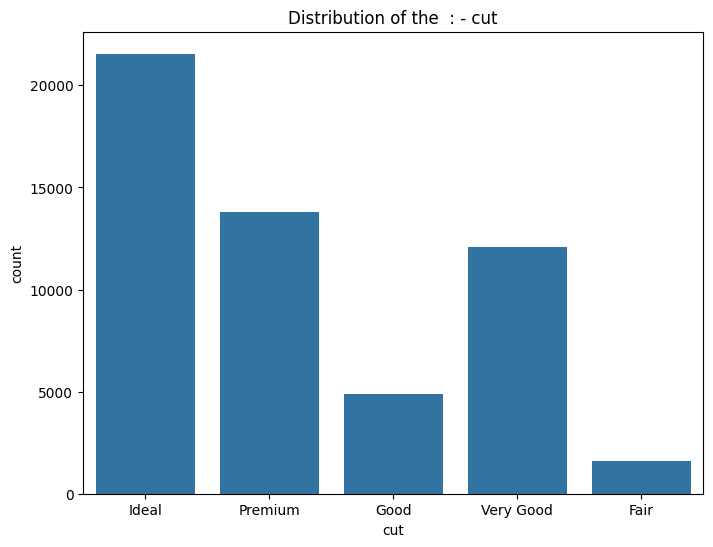

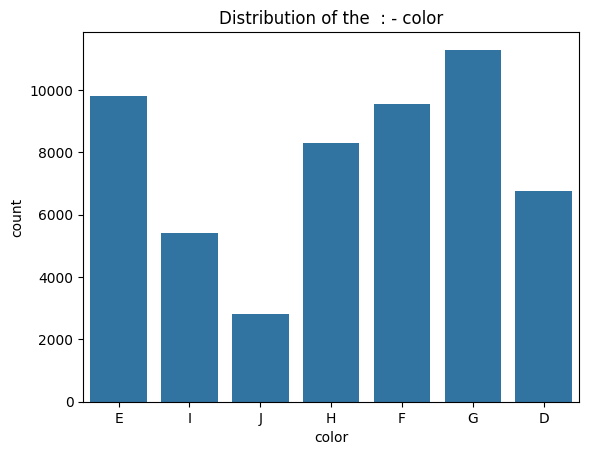

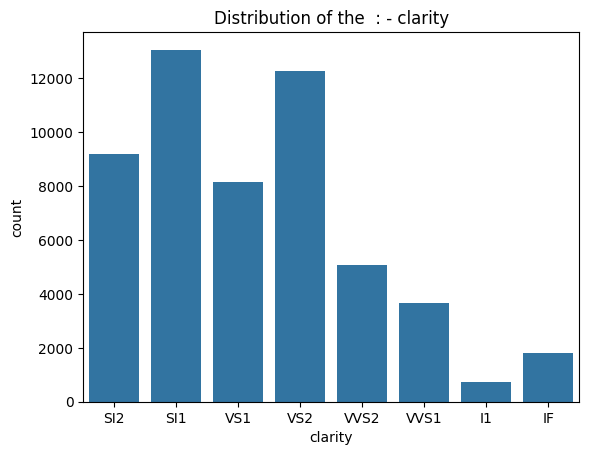

In [203]:
plt.figure(figsize=(8,6))
x=0
for i in obj_col:
    sns.countplot(data=df,x=i)
    plt.title(f"Distribution of the  : - {i}")
    plt.show() 

In [204]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [205]:
df_copy=df.copy()

In [206]:
data_cat=df[obj_col]

In [207]:
data_cat['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [208]:
data_cat['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [209]:
data_cat['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [210]:
data_cat

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [211]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split




In [212]:
pipe=Pipeline([
    ('num',MinMaxScaler()),
    ('obj',OrdinalEncoder())
]
    
)

In [213]:
cut_map = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
color_map = {'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
clarity_map = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}


In [214]:
df['cut']=df['cut'].map(cut_map)
df['color']=df['color'].map(color_map)
df['clarity']=df['clarity'].map(clarity_map)

In [215]:
df['cut']

0        4
1        3
2        1
3        3
4        1
        ..
53935    4
53936    1
53937    2
53938    3
53939    4
Name: cut, Length: 53940, dtype: int64

In [216]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# Make sure X is a DataFrame
X = df.drop("price", axis=1)
y = df["price"]

data_num = X.select_dtypes(include=["int64", "float64"]).columns
data_cat = X.select_dtypes(include=["object"]).columns


x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


col_trans = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), data_num),
        ('obj', OrdinalEncoder(), data_cat)
    ]
)

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

pipe1 = Pipeline([
    ('preprocess', col_trans),
    ('rf', rf)
])

pipe1.fit(x_train, y_train)
 

,steps,"[('preprocess', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('obj', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [217]:
y_pred=pipe1.predict(x_test)

In [218]:
print(r2_score(y_pred,y_test))
print("Train R2:", pipe1.score(x_train, y_train))
print("Test R2 :", pipe1.score(x_test, y_test))


0.9815961857707455
Train R2: 0.9948287554806976
Test R2 : 0.9817569303154212
